In [251]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Step1:- Data Collection

In [252]:
df = pd.read_csv('train.txt', sep=';', header=None, names=['text', 'emotion'])

In [253]:
df.sample(5)

,text,emotion
14520,i am feeling ever so homesick,sadness
11322,i feel shy at the fact that i love these inani...,fear
672,i feel as though i cant bear the motion of qui...,joy
5347,i would feel timid wearing them beacuse id try...,fear
15630,i feel regretful that i didnt bring overnight ...,sadness


In [254]:
df.shape

(16000, 2)

In [255]:
# df.info()

<Axes: title={'center': 'Distribution of Emotions'}, xlabel='count', ylabel='emotion'>

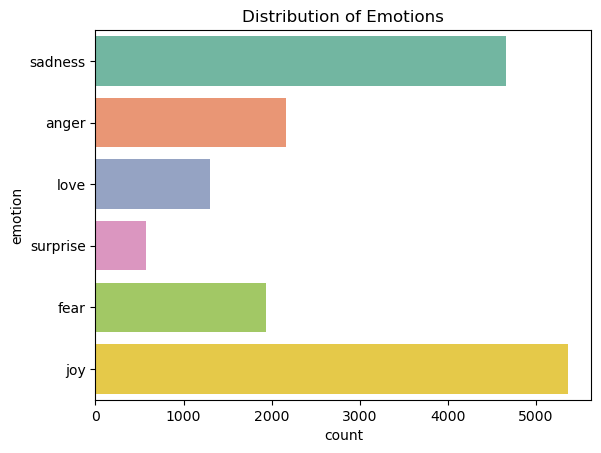

In [256]:
import matplotlib.pyplot as plt 
import seaborn as sns  

plt.title('Distribution of Emotions')
sns.countplot(df['emotion'], palette='Set2')



In [257]:
df.duplicated().sum()

np.int64(1)

In [258]:
df[df.duplicated()]

,text,emotion
13846,i feel more adventurous willing to take risks ...,joy


In [259]:
df.isna().sum()

text       0
emotion    0
dtype: int64

In [260]:
df['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

# Step 2:- Text Cleaning

In [261]:
# Mapping individual emotions to numbers

unique_emotions = df['emotion'].unique()
emotion_numbers = {}
i = 0 
for emotion in unique_emotions: 
    emotion_numbers[emotion] = i 
    i+=1 
df['emotion'] = df['emotion'].map(emotion_numbers)
    

In [262]:
df.sample(5)

,text,emotion
3657,i always had a feeling of being in shape and b...,1
13890,i write that i feel a bit anxious,4
14412,i have been doing absolutely no exercise howev...,5
13580,im feeling very thankful for the rhythm of the...,5
9984,i feel so blessed that god has chosen me to he...,2


**1. Convert all the text to Lowercase**

In [263]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [264]:
# df['text'].sample(3)

**2. Remove Punctuations**

In [265]:
import string

def remove_punctuation(txt):
    return txt.translate(str.maketrans('','',string.punctuation))
    

In [266]:
df['text'] = df['text'].apply(remove_punctuation)
# df['text'].head()

**3. Remove Numbers** 

In [267]:
def remove_num(txt): 
    new = ''
    for i in txt: 
        if not i.isdigit():
            new = new + i
    return new 

df['text'] = df['text'].apply(remove_num)

In [268]:
# df['text'].head()

**4. Remove URLs / Links**

In [269]:
import re 
def remove_urls(txt): 
    if  not isinstance(txt, str) or pd.isna(txt):
        return ''
    url_patterns = r'https?://\S+|www\.\S+'
    return re.sub(url_patterns, '', txt).strip()

df['text'] = df['text'].apply(remove_urls)

In [270]:
# df.head(5)

**5. Remove HTML Tags**

In [271]:
# This data set doesnot contain any of HTML tags

**6. Remove Emojis and Special Characters**

In [272]:
def remove_emojis(text):
    new = ''
    for i in text: 
        if i.isascii():
             new = new+i 
    return new 
    
df['text'] = df['text'].apply(remove_emojis)    

In [273]:
# df.head()

**7. Remove StopWords**

In [274]:
import nltk

In [275]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [276]:
# nltk.download('punkt')
# nltk.download('punkt_tab') 
# nltk.download('stopwords')

In [277]:
stop_words = set(stopwords.words('english'))

In [278]:
len(stop_words)

198

In [279]:
df.loc[1]['text']

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [280]:
def remove_stopWords(text):
    word = word_tokenize(text)
    cleaned = []
    for i in word: 
        if not i in stop_words: 
            cleaned.append(i)

    return ' '.join(cleaned)

df['text'] = df['text'].apply(remove_stopWords)    

In [281]:
# df.iloc[1]['text']   # Now there are not any stopwords in text anymore..

# Step3:- Feature Extraction / Vectorization

**One Hot Encoding**

**Bag of Words**

In [282]:
# from sklearn.feature_extraction.text import CountVectorizer

In [283]:
# documents = [
#    "I want to Learn following skills", 
#    "I want to be AI engineer",
#    "I want to learn Django",
#    "Then I will learn Django Rest Framework",
#    "Then I will call myself as Full Stack Flutter Developer"
#]

# setting ngram_range as (1,1)

# vectorizer = CountVectorizer(ngram_range=(1,1))
# X = vectorizer.fit_transform(documents)

# print("Vocabulary:", vectorizer.get_feature_names_out())
# print('\nBow Matrix\n', X.toarray())


In [284]:
# setting ngram_range as (2,2)
# count1 = CountVectorizer(ngram_range=(2,2))
# X1 = count1.fit_transform(documents)
# print('Vocabulary:',count1.get_feature_names_out())
# print('\nBow Matrix\n', X.toarray())

In [285]:
# setting ngram_range as (5,5)
# count2 = CountVectorizer(ngram_range=(5,5))
# X2 = count2.fit_transform(documents)
# print('Vocabulary:',count2.get_feature_names_out())
# print('\nBow Matrix\n', X.toarray())

**TF-IDF** 

In [286]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [287]:
# documents1 = [
#     "I want to Learn following skills", 
#     "I want to be AI engineer",
#     "Then I will call myself as Full Stack Flutter Developer"
# ]

# vectorizer1 = TfidfVectorizer() 

# X1 = vectorizer1.fit_transform(documents1)

# print('Vocabulary is:', vectorizer1.get_feature_names_out())
# print('\nBox Matrix of TF-IDF is:\n', X1.toarray())


# Applying Vectorization to above Data Set

In [288]:
# df.head()

**Applying Bag of Words**

In [289]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = df['text']
y = df['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 42)


In [290]:
print("Size of X train is: ",len(X_train)) 
print("Size of X test is: ",len(X_test))

Size of X train is:  12800
Size of X test is:  3200


In [291]:

bow_vectorizer = CountVectorizer()
X_train_Bow = bow_vectorizer.fit_transform(X_train)
X_test_Bow = bow_vectorizer.transform(X_test)


**--- Applying MultiNomial Naive bayes ---**

In [292]:
from sklearn.naive_bayes import MultinomialNB

multiNB_Model = MultinomialNB()
multiNB_Model.fit(X_train_Bow, y_train)


MultinomialNB()

In [293]:
multiNB_predict = multiNB_Model.predict(X_test_Bow)
print('Accuracy is: ', accuracy_score(y_test, multiNB_predict))

Accuracy is:  0.7678125


**Applying TF-IDF**

In [294]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer()
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)   


In [295]:
mnb_Model = MultinomialNB()
mnb_Model.fit(X_train_tf, y_train)

MultinomialNB()

In [296]:
mnb_predict = mnb_Model.predict(X_test_tf)
print("Accuracy is: ", accuracy_score(y_test, mnb_predict))

Accuracy is:  0.6609375


**--- Applying Logistic Regression ---**

In [297]:
from sklearn.linear_model import LogisticRegression

In [298]:
# For Bag of Words 

In [299]:
logistic_Model1 = LogisticRegression()
logistic_Model1.fit(X_train_Bow, y_train)

LogisticRegression()

In [300]:
l1_predict = logistic_Model1.predict(X_test_Bow)
print("Accuracy is: ", accuracy_score(y_test, l1_predict))

Accuracy is:  0.88875


In [301]:
# For TF-IDF 

In [302]:
logistic_Model2 = LogisticRegression()
logistic_Model2.fit(X_train_tf, y_train)

LogisticRegression()

In [303]:
l2_predict = logistic_Model2.predict(X_test_tf)
print("Accuracy is: ", accuracy_score(y_test, l2_predict))
print("Classification Report is:")
print('')
print(classification_report(y_test, l2_predict))

Accuracy is:  0.8615625
Classification Report is:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       946
           1       0.90      0.81      0.86       427
           2       0.90      0.61      0.72       296
           3       0.88      0.47      0.61       113
           4       0.86      0.76      0.80       397
           5       0.81      0.96      0.88      1021

    accuracy                           0.86      3200
   macro avg       0.88      0.76      0.80      3200
weighted avg       0.87      0.86      0.86      3200



In [304]:
pd.DataFrame(y_train).value_counts

<bound method DataFrame.value_counts of        emotion
676          5
12113        0
7077         2
13005        0
12123        1
...        ...
13418        4
5390         2
860          0
15795        0
7270         1

[12800 rows x 1 columns]>

In [305]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
pd.DataFrame(y_resampled).value_counts()


ValueError: could not convert string to float: 'refers course though cant help feeling somehow ironically retrospect loudons son kate mcgarrigle rather talented rufus wainwright'

In [ ]:
logistic_Model3 = LogisticRegression()
logistic_Model3.fit(X_resampled, y_resampled)

In [ ]:
l3_predict = logistic_Model3.predict(X_test_tf)
print("Accuracy is: ", accuracy_score(y_test, l3_predict))
print("Classification Report is:")
print('')
print(classification_report(y_test, l2_predict))

# Saving Model using Pickle

In [ ]:
# import pickle

In [ ]:
# Save the TF-IDF vectorizer

# with open('tfidf_vectorizer1.pkl', 'wb') as f:
#    pickle.dump(tf_vectorizer, f)


# Save the trained Logistic Regression model

# with open('logistic_model3.pkl', 'wb') as f:
#    pickle.dump(logistic_Model3, f)